# Set Up of the problem

We consider the homogeneous wave equation in $\mathbb{R}^+ \times \mathbb{R}^3$:
$$
\begin{cases}
\displaystyle\frac{1}{c_0^2}\frac{\partial^2 u}{\partial t^2} - \Delta u = n(t,\mathbf{x})\\
u(0,\mathbf{x}) = 0 \\
\partial_t u(0,\mathbf{x}) = 0\\
\end{cases}
$$
with $c_0$ the velocity of the wave in the medium.
it has been seen in the lesson that a unique solution exists, and admits the following representation:
$$
u(t,\mathbf{x}) = \int_{B(x,c_0t)} \frac{1}{4\pi| \mathbf{x} - \mathbf{x}'|} n(t - \frac{|\mathbf{x} - \mathbf{x}'|}{c_0},\mathbf{x}')d\mathbf{x}'
$$
We can interpret it as $u$ being the superposition of what was emitted in the ball centered to $\mathbf{x}$ of radius $c_0t$. Extending $n$ to $0$ for negative time (recall the wave equation is considered only for positive time here), we can then write the integral over the whole space $\mathbb{R}^+ \times \mathbb{R}^3$.


it can be re-written as
$$
u(t,\mathbf{x}) = (G \star n)(t,\mathbf{x})
$$
where $G$ is the Green 'function' of the wave equation (actually a distribution but it is a detail). Here $G(t,\mathbf{x},\mathbf{x}') = G'(t,\mathbf{x} - \mathbf{x}') = \frac{\delta(t - \frac{|\mathbf{x} - \mathbf{x}'|}{c_0})}{4\pi |\mathbf{x} - \mathbf{x}'|}$ for $\mathbf{x} \neq \mathbf{x}'$.

We will only consider solutions satisfying Sommerfeld radiation equation (to only account solutions decaying fast enough and going outward) :
$$
|\mathbf{x}|(\frac{\mathbf{x}}{|\mathbf{x}|}\cdot \nabla_x\hat{G}(\omega,\mathbf{x}, \mathbf{y}) - \frac{i\omega}{c_0}\hat{G}(\omega,\mathbf{x}, \mathbf{y})) \rightarrow 0
$$
where $\hat{G}$  is the time Fourier-transform of $G$ : $\hat{G}(\omega, \mathbf{x}, \mathbf{y}) = \displaystyle\frac{1}{4\pi |\mathbf{x} - \mathbf{y}|}e^{\displaystyle i\frac{\omega}{c_0}|\mathbf{x} - \mathbf{y}|}$. Using the time-Fourier transform, we can change the $4-d$ convolution to a $3d$ space convolution i.e express the solution as :
$$
\hat{u}(\omega,\mathbf{x}) = \displaystyle\int_{\mathbb{R}^3} \hat{G}(\omega,\mathbf{x},\mathbf{y})n(\omega, \mathbf{y}) d\mathbf{y}
$$

However, here, $n$ is a stochastic term. More precisely, it is a gaussian process of $\mathbb{R}^4$. Let's recall a gaussian process has the agreable property to be defined uniquely by only its mean and covariance kernel. In our case, we'll suppose it is centered (i.e $\forall (t,\mathbf{x}) \in \mathbb{R}^4,\quad \mathbb{E}[n(t,\mathbf{x})] = 0$) and has the following covariance kernel
$$
\forall (t,\mathbf{x}), (t',\mathbf{x}') \in \mathbb{R}^4, \quad \mathbb{E}[n(t,\mathbf{x})n(t',\mathbf{x}')] = F(t - t')\delta(\mathbf{x} - \mathbf{x}')K(\mathbf{x})
$$
We immediately see that the noise is stationary in time. We will define here $K(\mathbf{x}) = \prod\limits_{i = 1}^3 \frac{1}{\sqrt{2\pi}\sigma_i}\exp{-\frac{(\mathbf{x}_i - \mu_i)^2}{2\sigma_i^2}}$ so that the 3 coordinates of space are decoupled, et $F$ by its Fourier transform $\hat{F}(\omega) = \omega^2 \exp({-\omega^2})$

In order to numerically implement the noise, we will first fix a number of source ($N = 10^4$ for now) $(\mathbf{x}_1^S, \cdots, \mathbf{x}_N^S)$. Their positions are drawn from the law of density K i.e a 3D gaussian law.
Then, we simulate N 1D zero-mean stationnary gaussian process with variance $\mathbb{E}[n_i(t)n_i(t')] = \delta_{ij}F(t - t')$ $\forall i \in \{1, \cdots, N\}$, where $n(\cdot, \mathbf{x}_i^S) = n_i(\cdot)$ and $\delta_{ij}$ is here the Kronecker symbol.

The considered noise will finally express as :
$$
n(t,\mathbf{x}) = \frac{1}{\sqrt{N}}\sum\limits_{i = 1}^N n_i(t)\delta(\mathbf{x} - \mathbf{x}_i^S)
$$
with $\delta$ the Dirac distribution.

To simulate a 1D gaussian process, we need to admit the following representation formula :
$$
n_i(\mathbf{t}) = \frac{1}{2\pi}\int_{\mathbb{R}} e^{i\omega t} \sqrt{\hat{F}(\omega)}\hat{W}_\mathbf{\omega}d\mathbf{\omega}
$$
where $\hat{W}_\omega$ is a complex white noise i.e $\mathbb{E}[\hat{W}_\omega] = 0$ and $\mathbb{E}[\hat{W}_\omega\hat{W}_{\omega'}] = (2\pi)^d\delta(\omega - \omega')$. This integral should actually be rigorously represented as a Wiener integral w.r.t the Brownian motion. And there is several ways to simulate $\hat{W}_{\omega}$. The first one being to directly sample from a complex gaussian distribution. One can set $\hat{W}_{\omega} = (2\pi)^{d/2}\displaystyle\frac{U + iV}{\sqrt{2}}$ where $U$ and $V$ are real standard gaussian distribution. The second is to compute it as the fourier transform of a real standard gaussian distribution $W_t$: $\hat{W}_{\omega} = \int_{\mathbb{R}} W_t e^{-i\omega t} dt$. In the following work, the second option was chosen.
To sum up, the randomness of $n$ has been transfered to standard random process we know how to sample from easily, to the cost of having to compute an integral.

We can combine all this set-up by expressing $u$ as :
$$
u(t,\mathbf{x}) = \frac{1}{\sqrt{N}}\sum_{i = 1}^N\int_{\mathbb{R}^4}\hat{G}(\omega,\mathbf{x},\mathbf{y})\hat{n}_i(\omega)e^{-i\omega t}dt d\mathbf{y}
$$

# Numerical simulation

## Set up of the simulation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
N = 10000
c0 = 1

Generate the sources

In [2]:
def generate_sources(N):
    """Generate N sources according to the desired distribution"""

    # spatial distribution of the sources
    mu = np.array([0.0, -200.0, 0.0])
    sigma = np.array([100.0, 50.0, 100.0])

    sources = mu + np.random.randn(N, 3) * sigma

    return sources

Define the receivers

In [3]:
def generate_receivers(situation):
    """Generate the 5 sources in one of the 3 situations"""

    receivers = np.zeros((5, 3), dtype='float')

    if situation == 1:
        receivers[:, 1] = np.arange(5) * 50

    elif situation == 2:
        receivers[:, 1] = np.arange(5) * 5

    else:
        receivers[:, 0] = (np.arange(5) - 2) * 50
        receivers[:, 1] = 100

    return receivers

Green function in homogeneous medium in frequency variable : $\hat{G}(\omega,\mathbf{x},\mathbf{y},c_0) = \displaystyle\frac{e^{i\frac{\omega}{c_0}|\mathbf{x} - \mathbf{y}|}}{4\pi|\mathbf{x} - \mathbf{y}|}$

In [4]:
def Green_function(w,x,y,c = 1):
  """
  Compute the green function in frequency variable.
  Args :
    w : pulsation (float)
    x : position of the emission
    y : position of the receiver
    c : celerity of waves in the medium
  """
  return np.exp(1j*w/c*np.linalg.norm(x - y))/(4*np.pi*np.linalg.norm(x - y))

Plot the configuration

In [5]:
sources = generate_sources(N) # shape (1000, 3)
receivers = generate_receivers(2) # shape (5, 3)

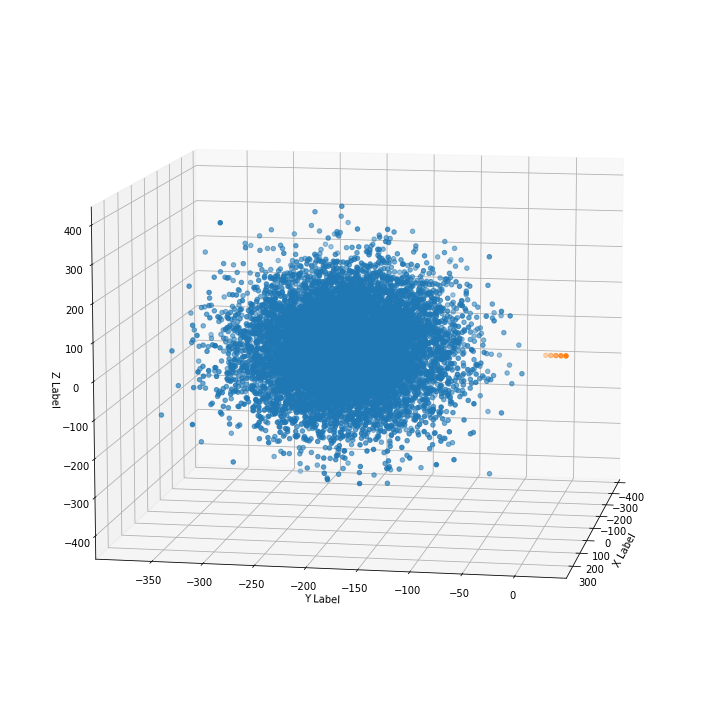

In [6]:
fig = plt.figure(figsize=(13,13))
ax = fig.add_subplot(projection='3d')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.view_init(10, 10) #elevation (rotation around y-axis) and azimuth (rotation around z-axis) angles
ax.scatter(sources[:,0], sources[:,1], sources[:,2])
ax.scatter(receivers[:,0], receivers[:,1], receivers[:,2])

## Generate noise signals

The two following functions are equivalent and will be used to generate the noise produced by each source.
The Choleski method is only a reference and it is much slower and intractable for more than a few thousand points.

It computes :
$$
n_i(\mathbf{x},t) = n_i(\mathbf{t}) = \int_{\mathbb{R}} e^{-i\omega t} \sqrt{\hat{F}(\omega)}\hat{W}_\mathbf{\omega}d\mathbf{\omega}
$$

In [7]:
def stationary_gaussian_process(n_points, delta, cor_spec, type, remove_length=10):
    """
    Generates stationary gaussian noise on a vector of points using the method
    described in section 6.4.8 of the lecture notes, using the fourier transform of the
    time correlation function

    Parameters:
    - n_points: number of points in the returned vector
    - delta: time between two consecutive points
    - cor_spec: fourier transform of the autocorrelation function
    - type: 'temporal' if you wish to have the time noise, or 'spectral' for frequency-variable noise
    - remove_length: number of samples deleted at the end of the process

    Returns:
    - process: np array of size n_points
    """
    n = n_points + remove_length

    cor = cor_spec(np.linspace(0, 2*np.pi, n) / delta) / delta
    cor += cor_spec(np.linspace(-2*np.pi, 0, n) / delta) / delta
    cor = np.sqrt(cor)

    process = np.random.randn(n)

    process_fft = np.fft.fft(process, norm="ortho") #backward

    if type == 'temporal':
      process = np.fft.ifft(cor * process_fft, norm="ortho").real#, norm="forward")) #ortho
      process = process[:n_points]
      return process
    if type == 'spectral':
      return (cor * process_fft)[:n_points]

It computes :
$$
(n_i(t_1), \cdots, n_i(t_K)) = m + C^{\frac{1}{2}}W
$$
with $W$ a $K-$ standard gaussian random vector.
In our case, $m = 0$. This method is not very computationally efficient for large number of points, because it implies diagonalizing or compute the Cholesky decomposition  i.e find a lower triangular matrix such that $C = LL^\top$. In general, a matrix factorization costs $\mathcal{O}(n^3)$ operations, so it does not scale up very well.

In [8]:
def cholesky_generation(n_points, delta, cor_func):
    t_1, t_2 = np.meshgrid(np.arange(n_points) * delta, np.arange(n_points) * delta)
    cor_matrix = cor_func(t_1 - t_2) + np.eye(n_points) * 1e-10
    cholesky = np.linalg.cholesky(cor_matrix)
    process = cholesky @ np.random.randn(n_points)
    return process

Definition of the temporal correlation function :

*   In its spectral form
$$
\hat{F}(\omega) = \omega^2\exp(-\omega^2)
$$
*   In its temporal form
$$
F(t) = -\frac{1}{8 \sqrt{\pi}}\exp(-t^2/4)(t^2 - 2)
$$

In [9]:
cor_spec = lambda omega: omega**2 * np.exp(-omega**2) # \hat{F} given in the subject
cor_temp = lambda t: -np.exp(-t**2 / 4) * (t**2 - 2) / 4 / np.sqrt(2) / np.sqrt(2*np.pi) # its inverse Fourier transform

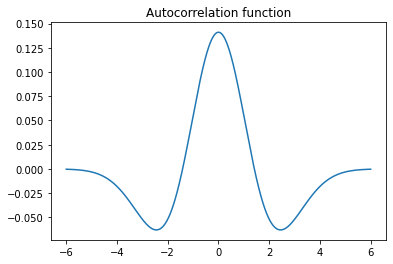

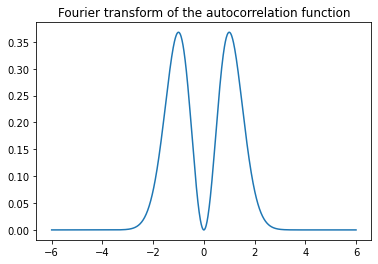

In [10]:
t = np.linspace(-6, 6, 1000)
plt.plot(t, cor_temp(t))
plt.title("Autocorrelation function")
plt.show()

plt.plot(t, cor_spec(t))
plt.title("Fourier transform of the autocorrelation function")
plt.show()

### Test the two functions

Generation using the spectral density

0.16521136726382882


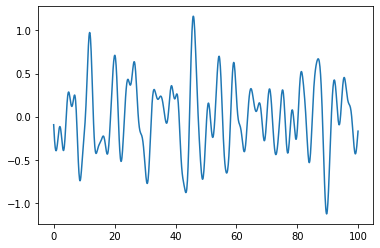

In [11]:
delta_t = 1e-1 #time step
n_points = 1000 #number of point of simulation
Z_1 = stationary_gaussian_process(n_points, delta_t, cor_spec, 'temporal', remove_length=100)
print(np.mean(Z_1**2))
plt.plot(np.arange(n_points) * delta_t, Z_1)
plt.show()

(-0.010213974468544768+0.006293534750943937j)


C:\Users\hugon\AppData\Roaming\Python\Python39\site-packages\matplotlib\cbook\__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


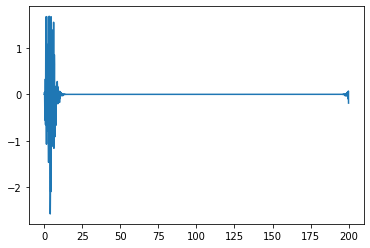

In [12]:
delta_t = 1e-1 #time step
n_points = 2000 #number of point of simulation
Z_1_f = stationary_gaussian_process(n_points, delta_t, cor_spec, 'spectral',remove_length=100)
print(np.mean(Z_1_f**2))
plt.plot(np.arange(n_points) * delta_t, Z_1_f)
plt.show()

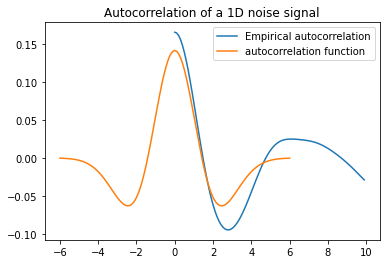

In [13]:
empirical_corr = np.zeros(100)
empirical_corr[0] = np.mean(Z_1**2)
for i in range(1, 100):
    empirical_corr[i] = np.mean(Z_1[i:] * Z_1[:-i])

plt.plot(np.arange(100) * delta_t, empirical_corr, label = 'Empirical autocorrelation')
plt.title("Autocorrelation of a 1D noise signal")
t = np.linspace(-6, 6, 1000)
plt.plot(t, cor_temp(t), label = 'autocorrelation function')
plt.legend()
plt.show()

Generation using the Cholesky method

0.12098742467324895


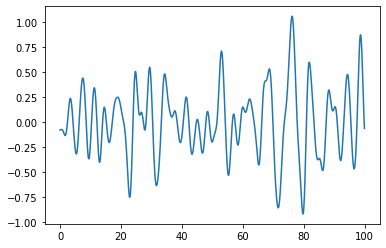

In [14]:
delta_t = 1e-1
n_points = 1000
Z_2 = cholesky_generation(n_points, delta_t, cor_temp)
print(np.mean(Z_2**2))
plt.plot(np.arange(n_points) * delta_t, Z_2)
plt.show()

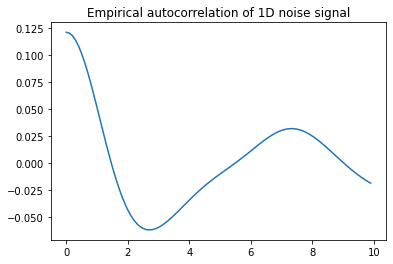

In [15]:
empirical_corr = np.zeros(100)
empirical_corr[0] = np.mean(Z_2**2)
for i in range(1, 100):
    empirical_corr[i] = np.mean(Z_2[i:] * Z_2[:-i])

plt.plot(np.arange(100) * delta_t, empirical_corr)
plt.title("Empirical autocorrelation of 1D noise signal")
plt.show()

## Question 1

Writing $u(t,\mathbf{x}_1) = \displaystyle\frac{1}{2\pi}\displaystyle\int_{\mathbb{R}^4} \hat{G}(\omega,\mathbf{x}_1,\mathbf{y})n(\omega, \mathbf{y})e^{i\omega t}d\omega d\mathbf{y} = \frac{1}{2\pi\sqrt{N}}\sum_{i = 1}^N \displaystyle\int_{\mathbb{R}^4}\hat{G}(\omega,\mathbf{x}_1,\mathbf{y})n_i(\omega,\mathbf{y})\delta(\mathbf{y} - \mathbf{x}_i^S) e^{i\omega t}d\omega d\mathbf{y} = \frac{1}{2\pi\sqrt{N}}\sum_{i = 1}^N \displaystyle\int_{\mathbb{R}}\hat{G}(\omega,\mathbf{x}_1,\mathbf{x}_i^S)n_i(\omega) e^{i\omega t}d\omega$
In a very similar way,
$$
u(t + \tau,\mathbf{x}_2) = \frac{1}{2\pi\sqrt{N}}\sum_{i = 1}^N \displaystyle\int_{\mathbb{R}}\bar{\hat{G}}(\omega,\mathbf{x}_1,\mathbf{x}_i^S)\bar{n}_i(\omega) e^{-i\omega (t + \tau)}d\omega
$$
Taking the product immediately gives
$$
u(t,\mathbf{x}_1)u(t + \tau,\mathbf{x}_2) = \frac{1}{4\pi^2 N}\sum_{i,j = 1}^N \displaystyle\int_{\mathbb{R}^2}\hat{G}(\omega,\mathbf{x}_1,\mathbf{x}_i^S)n_i(\omega)\bar{\hat{G}}(\omega',\mathbf{x}_2,\mathbf{x}_j^S)\bar{n}_j(\omega') e^{it(\omega - \omega')} e^{-i\omega'\tau}d\omega d\omega'
$$


By first taking the expectation of the above expression, the $t$ variable disappears. Then integrating over $[0, T - |\tau|]$ and dividing by $T - |\tau|$ cancel each other. Therefore,
$$
C_T(\tau,\mathbf{x}_1,\mathbf{x}_2) = \frac{1}{2\pi N}\sum_{i = 1}^N \int_{\mathbb{R}} \hat{F}(\omega)\hat{G}(\omega,\mathbf{x}_1,\mathbf{x}_i^S)\bar{\hat{G}}(\omega,\mathbf{x}_1,\mathbf{x}_j^S)e^{-i\omega \tau} d\omega
$$

We actually used the following relation : $\mathbb{E}[\hat{n}_i(\omega)\hat{n}_j(\omega')] = 2\pi\delta_{i,j}\delta(\omega - \omega')\hat{F}(\omega)$. The decoupling of the different frequencies is a direct consequence of the stationarity of the signal. Indeed, starting from $\mathbb{E}[n_i(t)n_j(t')] =\delta_{ij} F(t-t')$, and taking succesively the Fourier transform of the $t$ and $t'$ variables, one has thanks to the linearity of the expectation :
$$
\mathbb{E}[\hat{n}_i(\omega)\bar{\hat{n}}_j(\omega')] =\delta_{ij} \int_{\mathbb{R}^2}F(t - t')e^{-i\omega t} e^{i\omega' t'} dt dt'
$$
Using a change of variable, one can separate the two integrals :
$$
\int_{\mathbb{R}^2}F(t - t')e^{-i\omega t} e^{-i\omega' t'} dt dt' = \underbrace{\int_{\mathbb{R}}F(t)e^{-i\omega t} dt}_{\hat{F}(\omega)} \int_{\mathbb{R}} e^{i(\omega - \omega')t'}dt'
$$
and the second integral is ill-defined as a function. In the sense of distribution though :
$\int_{\mathbb{R}}e^{it(\omega - \omega')}dt = 2\pi \delta(\omega - \omega')$

Eventually, it yields the expected result.

### Numerical implementations of $C_N$

To compute numerically $C_N(\tau, \mathbf{x}_1, \mathbf{x}_2)$, we simplify its expression using the particular form of the green function to introduce a phase shift. Indeed, one can write:

$$\overline{\hat{G}(\omega, \mathbf{x}_1, \mathbf{y}_s)}\hat{G}(\omega, \mathbf{y}_s, \mathbf{x}_2)
=\frac{1}{16 \pi^2 |\mathbf{x}_1 - \mathbf{y}_s| \cdot |\mathbf{y}_s - \mathbf{x}_2|} \overline{\exp(i\frac{\omega}{c_0}|\mathbf{x}_1 - \mathbf{y}_s|) }
\exp(i\frac{\omega}{c_0}|\mathbf{y}_s - \mathbf{x}_2|)
$$

If we rearrange the factors, this leads to the following expression:
$$
C_N(\tau, \mathbf{x}_1, \mathbf{x}_2)=
\frac{1}{16 \pi^2 N} \sum_{s=1}^{N} \frac{1}{|\mathbf{x}_1 - \mathbf{y}_s| \cdot |\mathbf{y}_s - \mathbf{x}_2|}
\frac{1}{2\pi} \int d\omega \hat{F}(\omega)
\exp(\frac{i\omega}{c_0}(|\mathbf{y}_s - \mathbf{x}_2| - |\mathbf{x}_1 - \mathbf{y}_s|)) e^{-i\omega\tau}
$$

This will be our first method to compute $C_N$, using the FFT to compute for each source $\mathbf{y}_s$ the inverse Fourier transform of $\omega \mapsto \hat{F}(\omega)\exp(\frac{i\omega}{c_0}(|\mathbf{y}_s - \mathbf{x}_2| - |\mathbf{x}_1 - \mathbf{y}_s|))$.

We can also make use of the closed-form expression for the inverse Fourier transform of $\hat F$, by intepreting this phase shift in the temporal domain:

$$
C_N(\tau, \mathbf{x}_1, \mathbf{x}_2)=
\frac{1}{16 \pi^2 N} \sum_{s=1}^{N} \frac{1}{|\mathbf{x}_1 - \mathbf{y}_s| \cdot |\mathbf{y}_s - \mathbf{x}_2|}
\frac{1}{2\pi} \int d\omega \hat{F}(\omega)
\exp(-i\omega(\tau - \frac{1}{c_0}(|\mathbf{y}_s - \mathbf{x}_2| - |\mathbf{x}_1 - \mathbf{y}_s|)))
$$

It finally allows to compute $C_N$ directly in the temporal domain as a weighted sum of different time-shifted versions of $F$:

$$C_N(\tau, \mathbf{x}_1, \mathbf{x}_2)=
\frac{1}{16 \pi^2 N} \sum_{s=1}^{N} \frac{1}{|\mathbf{x}_1 - \mathbf{y}_s| \cdot |\mathbf{y}_s - \mathbf{x}_2|}
F(\tau - \frac{1}{c_0}(|\mathbf{y}_s - \mathbf{x}_2| - |\mathbf{x}_1 - \mathbf{y}_s|))
$$




In [16]:
def C_N_fft(ind_1, ind_2, receivers, sources, c_0=1, plot=False):
    """
    Computes C_N using the fft

    Parameters:
    ind_1: index of the first receiver
    ind_2: index of the second receiver
    receivers: array of shape (n_receivers, 3) containing all the receivers' positions
    sources: array of shape (n_sources, 3) containing all the sources' positions
    """

    x_1 = receivers[ind_1]
    x_2 = receivers[ind_2]

    # Compute the arrays of distances between the sources and the receivers
    dist_to_1 = np.linalg.norm(x_1 - sources, axis=1)
    dist_to_2 = np.linalg.norm(x_2 - sources, axis=1)
    dist_max = max(dist_to_1.max(), dist_to_2.max())


    # Parameters for the discretization
    eps = 1e-1 # Spectral resolution factor
    dW = eps * np.pi * c_0 / dist_max # Spectral resolution
    n = 10 / dW
    n = 2 * int(n/2) # Number of points used for the fft

    # Shifted time and frequency axes
    # The shift allows the significant values to be far from the extremities and avoid periodicity artifacts
    omega_axis = (np.arange(n)-n/2) * dW
    t_axis = (np.arange(n)-n/2) * 2*np.pi/dW/n

    # Initialize the representation of C_N
    sum_C_N = np.zeros(n, dtype=np.complex128)
    for y in tqdm(sources):
        d1 = np.linalg.norm(x_1 - y)
        d2 = np.linalg.norm(x_2 - y)

        # Phase shifted version of F hat
        fourier_func = np.exp(-1j*omega_axis*(d2 - d1) / c_0 - omega_axis**2) * omega_axis**2
        fourier_func /= 16 * np.pi**2 * d1 * d2

        # Apply the fft, the (-1)**n term takes into account the shift of temporal and spectral axes
        inv_fourier = np.fft.ifft(fourier_func) * (-1)**np.arange(n) * dW *n / 2 / np.pi
        sum_C_N += np.conj(inv_fourier)


    sum_C_N /= len(sources)

    # Shift back the temporal axis
    reorder_C_N = np.zeros(n, dtype=np.complex128)
    reorder_C_N[:n//2] = sum_C_N[n//2:]
    reorder_C_N[n//2:] = sum_C_N[:n//2]

    if plot:
      plt.figure(figsize=(10, 5))
      plt.plot(t_axis, np.real(reorder_C_N), label="Real part")
      plt.plot(t_axis, np.imag(reorder_C_N), label="Imaginary part")
      plt.legend()
      plt.ylabel("$C_N(\\tau, x_{}, x_{})$".format(ind_1, ind_2))
      plt.xlabel("$\\tau$")
      plt.xlim(-300, 300)
      plt.show()

    return t_axis, reorder_C_N

In [17]:
def C_N_closed_form(ind_1, ind_2, receivers, sources, c_0=1, t_min=-500, t_max=500, n_points=10000, plot=False):
    """
    Computes C_N in the temporal domain using the closed form expression of F

    Parameters:
    ind_1: index of the first receiver
    ind_2: index of the second receiver
    receivers: array of shape (n_receivers, 3) containing all the receivers' positions
    sources: array of shape (n_sources, 3) containing all the sources' positions
    t_min: beginning of the time axis
    t_max: end of the time axis
    n_points: number of time samples
    """

    x_1 = receivers[ind_1]
    x_2 = receivers[ind_2]

    # Define the time axis
    t_axis = np.linspace(t_min, t_max, n_points)

    # Intialize C_N
    sum_C_N = np.zeros(n_points)
    for y in tqdm(sources):
        # Distances between the source and the receivers
        d1 = np.linalg.norm(x_1 - y)
        d2 = np.linalg.norm(x_2 - y)

        shift = (d1 - d2) / c_0
        coef = d1 * d2
        sum_C_N += cor_temp(t_axis + shift) / coef

    sum_C_N /= 16 * np.pi**2 * len(sources)

    if plot:
        plt.figure(figsize=(10, 5))
        plt.plot(t_axis, sum_C_N)
        plt.legend()
        plt.ylabel("$C_N(\\tau, x_{}, x_{})$".format(ind_1, ind_2))
        plt.xlabel("$\\tau$")
        plt.xlim(0, 100)
        plt.show()

    return t_axis, sum_C_N

The next compare the results of both functions to compute $C_N$, it shows an almost perfect alignment between them.

As the closed form version is more straightforward to compute and as a better time complexity, we will only use this one afterwards.

  2%|▏         | 20/1000 [00:00<00:05, 190.38it/s]

100%|██████████| 1000/1000 [00:00<00:00, 2050.43it/s]


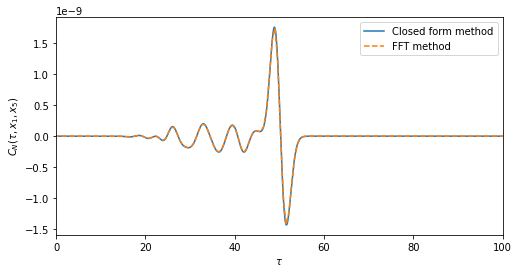

In [18]:
N = 10**3
sources = generate_sources(N)
receivers = generate_receivers(1)

t_axis_fft, reorder_C_N = C_N_fft(0, 1, receivers, sources, c_0=1)
t_axis_closed, sum_C_N = C_N_closed_form(0, 1, receivers, sources, c_0=1)

plt.figure(figsize=(8, 4))
plt.plot(t_axis_closed, sum_C_N, label="Closed form method")
plt.plot(t_axis_fft, np.real(reorder_C_N), label="FFT method", linestyle='--')
plt.legend()
plt.xlim(0, 100)
plt.ylabel("$C_N(\\tau, x_{}, x_{})$".format(1, 5))
plt.xlabel("$\\tau$")
plt.show()

### Plot $C_N$ in different configurations

In configuration 1, the receivers are aligned with the center of the distribution of the sources.

We observe that the further the two receivers are, the later the covariance peak is observed, which is due to the time spent by th emitted noise to travel the distance between them.

Moreover, the height of the peaks decreases very fast. There are two reasons explaining this, first, the covariance is bilinear in the amplitudes recorded by the two receivers, which themselves decrease in $\frac{1}{d}$, where $d$ is the distance between the sources and the receiver, and secondly, as the receivers get further apart, their correlation also decreases because the wave field changes as it propagates, due to the width of the soucre distribution


100%|██████████| 1000/1000 [00:00<00:00, 2087.30it/s]


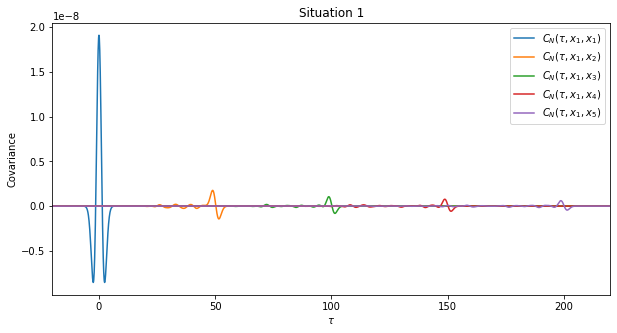

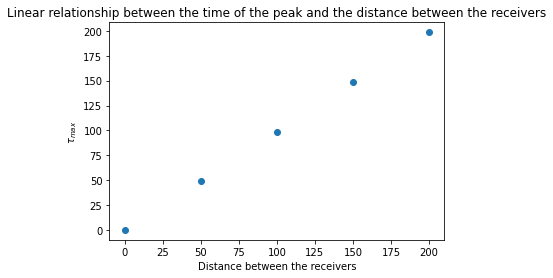

In [19]:
N=10**4
receivers = generate_receivers(situation=1)
plt.figure(figsize=(10, 5))
peak_times = []
peaks = []
for j in range(5):
    t_axis, C_N = C_N_closed_form(0, j, receivers, sources)
    ind = np.argmax(C_N)
    peaks.append(C_N[ind])
    peak_times.append(t_axis[ind])
    plt.plot(t_axis, C_N, label="$C_N(\\tau, x_{}, x_{})$".format(1, j+1))
plt.legend()
plt.ylabel("Covariance")
plt.xlabel("$\\tau$")
plt.xlim(-20, 220)
plt.title("Situation 1")
plt.show()

plt.scatter(np.linalg.norm(receivers - receivers[0], axis=1), peak_times)
plt.ylabel("$\\tau_{max}$")
plt.xlabel("Distance between the receivers")
plt.title("Linear relationship between the time of the peak and the distance between the receivers")
plt.show()


The second situation in very similar to the first one, the only difference is that the receivers are closer to each other.

This has two consequences, first, as the proportionality between the time $\tau_{max}$ of maximum correlation and the distance between the receivers is still true, the $\tau_{max}$ are smaller, and the second consequence is about the the decrease of the maximum covariance.
As the receivers are now close enough to each other compared to their distance to the sources, we can consider that the wave field which passes through the different receivers over time is more homogeneous, and only decreases in amplitude.
If this model is valid, then the covariance should decrease in $\frac{1}{d}$, where $d$ is the distance of the furthest receiver to the source (as the first receiver is always the same). The plot below show that this relationship is almost satisfied.

100%|██████████| 1000/1000 [00:00<00:00, 2070.91it/s]


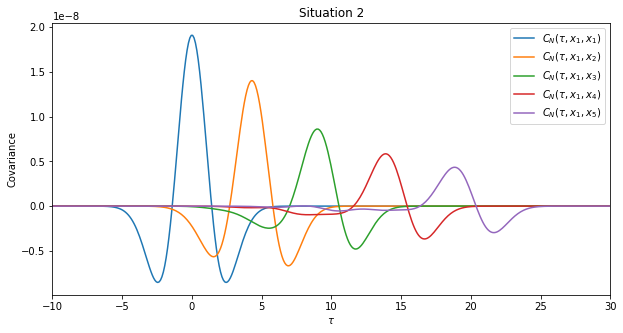

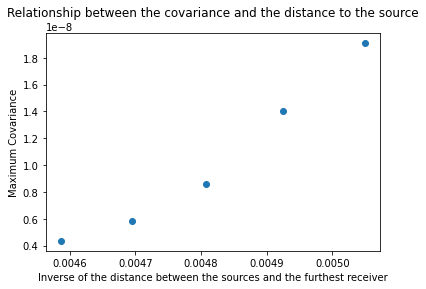

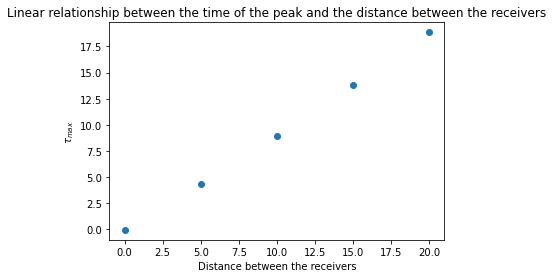

In [20]:
N=10**4
receivers = generate_receivers(situation=2)
plt.figure(figsize=(10, 5))

peak_times = []
peaks = []
for j in range(5):
    t_axis, C_N = C_N_closed_form(0, j, receivers, sources)
    ind = np.argmax(C_N)
    peaks.append(C_N[ind])
    peak_times.append(t_axis[ind])
    plt.plot(t_axis, C_N, label="$C_N(\\tau, x_{}, x_{})$".format(1, j+1))
plt.legend()
plt.ylabel("Covariance")
plt.xlabel("$\\tau$")
plt.xlim(-10, 30)
plt.title("Situation 2")
plt.show()

plt.scatter(1/np.linalg.norm(receivers - sources.mean(axis=0), axis=1), peaks)
plt.ylabel("Maximum Covariance")
plt.xlabel("Inverse of the distance between the sources and the furthest receiver")
plt.title("Relationship between the covariance and the distance to the source")
plt.show()

plt.scatter(np.linalg.norm(receivers - receivers[0], axis=1), peak_times)
plt.ylabel("$\\tau_{max}$")
plt.xlabel("Distance between the receivers")
plt.title("Linear relationship between the time of the peak and the distance between the receivers")
plt.show()

In the third situation below, the receivers are not aligned anymore in the direction of the sources.
The first thing that we notice in the first plot is that the covariance between the receivers is extremely weak between two distinct receivers. Therefore we display them separately in the next plots.

We can see that the support of the covariances are centered around 0 and that their width increase when the distance between the receivers increases.
This can be explained using the fact that $C_N(\tau, \mathbf{x}_i, \mathbf{x}_j)$ is a weighted sum of $F(\tau - \frac{1}{c_0}(|\mathbf{y}_s - \mathbf{x}_2| - |\mathbf{x}_1 - \mathbf{y}_s|))$. 
Indeed, the support of the covariance is the amplitude in which the time shift $\frac{1}{c_0}(|\mathbf{y}_s - \mathbf{x}_2| - |\mathbf{x}_1 - \mathbf{y}_s|)$ can vary when $\mathbf{y}_s$ takes values in the support of the distribution $K$, and this amplitude is larger when $|\mathbf{x}_1 - \mathbf{x}_2|$ is larger.

100%|██████████| 1000/1000 [00:00<00:00, 1889.19it/s]


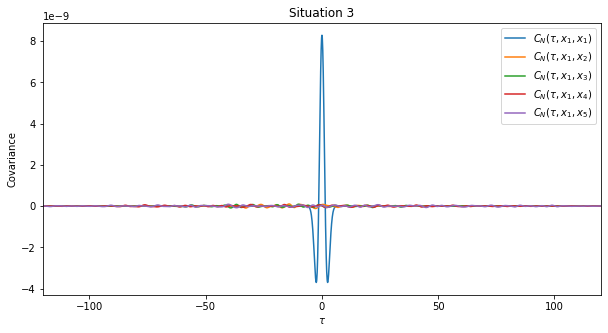

100%|██████████| 1000/1000 [00:00<00:00, 1919.31it/s]


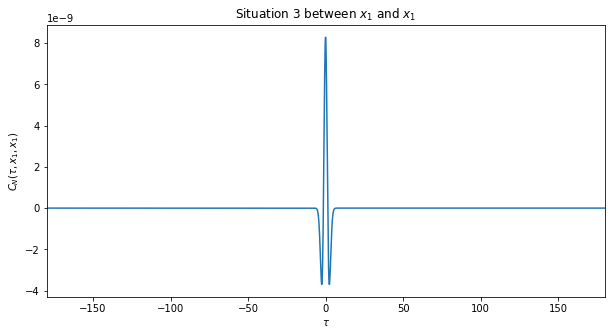

100%|██████████| 1000/1000 [00:00<00:00, 1698.95it/s]


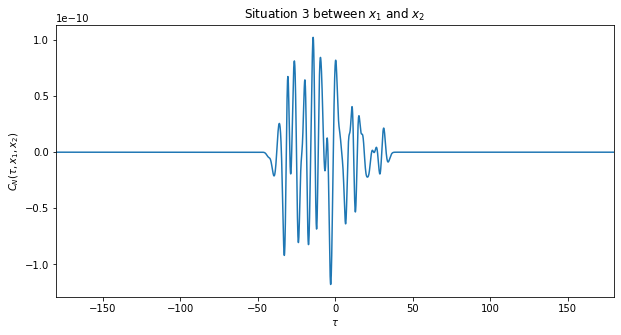

100%|██████████| 1000/1000 [00:00<00:00, 1522.28it/s]


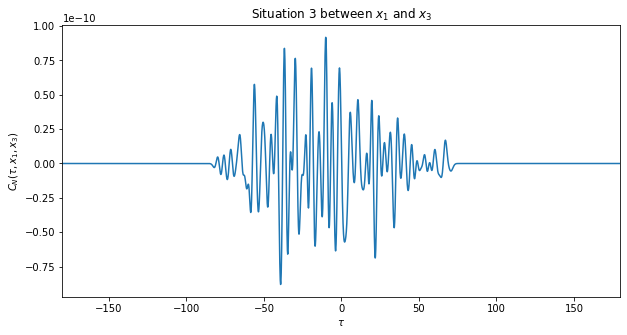

100%|██████████| 1000/1000 [00:00<00:00, 1899.12it/s]


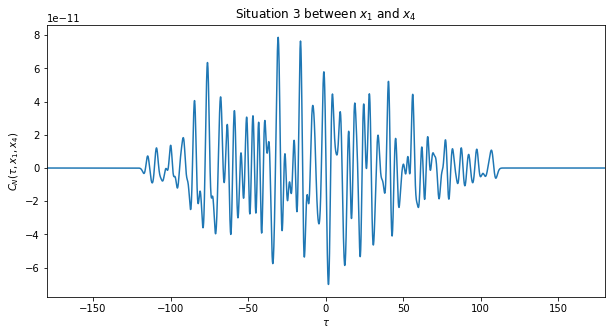

100%|██████████| 1000/1000 [00:00<00:00, 1968.69it/s]


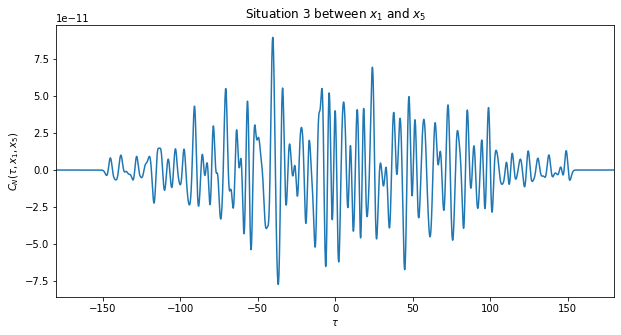

In [21]:
N=10**4
receivers = generate_receivers(situation=3)
plt.figure(figsize=(10, 5))
for j in range(5):
    t_axis, C_N = C_N_closed_form(0, j, receivers, sources)
    plt.plot(t_axis, C_N, label="$C_N(\\tau, x_{}, x_{})$".format(1, j+1))
plt.legend()
plt.ylabel("Covariance")
plt.xlabel("$\\tau$")
plt.xlim(-120, 120)
plt.title("Situation 3")
plt.show()

for j in range(5):
    t_axis, C_N = C_N_closed_form(0, j, receivers, sources)
    plt.figure(figsize=(10, 5))
    plt.plot(t_axis, C_N)
    plt.ylabel("$C_N(\\tau, x_{}, x_{})$".format(1, j+1))
    plt.xlabel("$\\tau$")
    plt.xlim(-180, 180)
    plt.title("Situation 3 between $x_{}$ and $x_{}$".format(1, j+1))
    plt.show()


## Question 2 & 3

We are wishing here to compute the following correlation quantity:  
$$
C_{T,N}(\tau, \mathbf{x}_1, \mathbf{x}_2) = \frac{1}{T - |\tau|}\int_0^{T - |\tau|}u(t,\mathbf{x}_1)u(t + \tau, \mathbf{x}_2)dt = \frac{1}{T - |\tau|}\int_0^{T}u(t - |\tau|,\mathbf{x}_1)u(t, \mathbf{x}_2)dt
$$

$u$ is a random quantity, but we can still reason realization by realization and use that
$$
u(t,\mathbf{x}) = \int_{B(x,c_0t)} \frac{1}{4\pi| \mathbf{x} - \mathbf{x}'|} n(t - \frac{|\mathbf{x} - \mathbf{x}'|}{c_0},\mathbf{x}')d\mathbf{x}' = \frac{1}{\sqrt{N}}\sum_{i = 1}^N \frac{1}{4\pi| \mathbf{x} - \mathbf{x}_i^S|}  n_i\large(t - \frac{|\mathbf{x} -\mathbf{x}_i^S|}{c_0}\large)\mathbf{1}_{\mathbf{x}_i^S \in B(\mathbf{x},c_0t)}
$$


It follows immediately that
$$
C_{T,N}(\tau, \mathbf{x}_1, \mathbf{x}_2) = \frac{1}{8\pi^2(T - |\tau|)N}\sum_{i,j = 1}^{N}\frac{1}{|\mathbf{x}_i^S - x_1|}\frac{1}{|\mathbf{x}_j^S - \mathbf{x}_2|}\int_0^{T - |\tau|}n_i(t - \frac{|\mathbf{x}_1 -\mathbf{x}_i^S|}{c_0}) n_j(t + \tau - \frac{|\mathbf{x}_2 -\mathbf{x}_j^S|}{c_0})\mathbf{1}_{\mathbf{x}_j^S \in B(\mathbf{x}_2,c_0t)} \mathbf{1}_{\mathbf{x}_i^S \in B(\mathbf{x}_1,c_0t)}dt
$$

We could then perform a standard sum along M uniformly spaced point in $[0,T - |\tau|]$.

Therefore, we arrive to :
$$
C_{T,N}(\tau, \mathbf{x}_1, \mathbf{x}_2) = \frac{1}{8\pi^2NM}\sum_{i,j = 1}^{N}\frac{1}{|\mathbf{x}_i^S - \mathbf{x}_1|}\frac{1}{|\mathbf{x}_j^S - \mathbf{x}_2|}\sum_{k = 0}^{M}n_i(t_k - \frac{|\mathbf{x}_1 -\mathbf{x}_i^S|}{c_0}) n_j(t_k + \tau - \frac{|\mathbf{x}_2 -\mathbf{x}_j^S|}{c_0})\mathbf{1}_{\mathbf{x}_j^S \in B(\mathbf{x}_2,c_0t_k)} \mathbf{1}_{\mathbf{x}_i^S \in B(\mathbf{x}_1,c_0t_k)}dt
$$
The above formula is of course way too complicated to compute as it is. It is then legitimate to use Fourier Transform, which will drastically simplify the calculations.

Let's first note that $u$ can be represented as :
$$
u(t,\mathbf{x}) = \displaystyle\frac{1}{2\pi}\displaystyle\int_{\mathbb{R}^4} \hat{G}(\omega,\mathbf{x},\mathbf{y})n(\omega, \mathbf{y})e^{i\omega t}d\omega d\mathbf{y}
$$
An idea could be, for a fixed $\tau$, to compute $u(t, \mathbf{x}_1)$ and  $u(t + \tau,\mathbf{x}_2)$ with IFFT, given the above representation. The shift could have been taken into account by multiplying every coefficient of the DFT by $e^{i\omega \tau}$. Then, we multiply them term by term and sum every coefficients. However, doing so for every $\tau$ is computationally too expensive.

Instead, we will write
$$
u(t - \tau,\mathbf{x}_1) = \frac{1}{2\pi\sqrt{N}}\sum_{i = 1}^N \displaystyle\int_{\mathbb{R}}\hat{G}(\omega,\mathbf{x}_1,\mathbf{x}_i^S)\hat{n}_i(\omega) e^{i\omega (t - \tau)}d\omega = \frac{1}{2\pi}\int_{\mathbb{R}}\hat{u}(\omega,\mathbf{x}_1) e^{i\omega (t - \tau)}d\omega
$$
and inject it into $C_{T,N}$.

It gives :
$$
C_{T,N}(\tau, \mathbf{x}_1, \mathbf{x}_2) = \frac{1}{2\pi (T - |\tau|)}\int_0^{T - |\tau|}u(t,\mathbf{x}_2)\displaystyle\int_{\mathbb{R}} \hat{u}(\omega,\mathbf{x}_1) e^{i\omega (t - \tau)}d\omega dt
$$
$$
=\frac{1}{2\pi (T - |\tau|)}\displaystyle\int_{\mathbb{R}}\hat{u}(\omega,\mathbf{x}_1) e^{-i\omega\tau}\underbrace{\int_0^{T-|\tau|}u(t,\mathbf{x}_2) e^{i\omega t}dt}_{(1)} d\omega = \frac{1}{2\pi (T - |\tau|)}\int_{\mathbb{R}}\bar{\hat{u}}(\omega,\mathbf{x}_1)\hat{u}(\omega,\mathbf{x}_2) e^{i\omega \tau} d\omega
$$

The term $(1)$ will be computed thanks to a FFT.


This function pretends to compute $C_{N,T}(\tau,\mathbf{x}_1, \mathbf{x}_2)$.
To calculate the noise, or rather its FT, it is straightforward to notice that
$\hat{n}(\omega) = \sqrt{\hat{F}}(\omega)\hat{W}_{\omega}$. The range of values taken by $\omega$ must be chosen large enough. I'll take $1000$ points.

In [22]:
def C_empirical(T,x1,x2,xS,N = 1000, M = 7000, c0 = 1):
  """
  Compute empirical cross correlation of the signal during a time T, with a delay tau, and between x1 and x2.
  Args :
    T : Time of simulation (float)
    x1 : Position of the first receiver (float 3 x 1)
    x2 : Position of the second receiver (float 3 x 1)
    N : Number of sources of ambiant noise (int)
    xS : positions of the sources (float N x 3)
    M : Number of step for the computation of the integral (int)
    c0 : velocity of the waves (float)
  Outputs :
    Returns C_T,N(tau,x1,x2)
  """

  Fe = M/T #Sampling frequency
  Omega = np.linspace(0,(M - 1)*Fe/M,M)*2*np.pi #range of frequencies
  tau = np.linspace(0,T*(M - 1)/M,M) #range of temporal shift
  #Complex Gaussian white noise
  Noise = np.empty((M,N), dtype = complex)
  for j in range(N): #For each sources
    Noise[:,j] = stationary_gaussian_process(M,1/(Fe*2*np.pi),cor_spec,'spectral')
  print('0')

  #First receiver
  u_x1_f = np.array([np.sum([Green_function(Omega[k], x1, sources[j])*Noise[k,j] for j in range(N)])/np.sqrt(N) for k in range(M)])
  print('1')

  #Second receiver
  u_x2_f = np.array([np.sum([Green_function(Omega[k], x2, sources[j])*Noise[k,j]/np.sqrt(N) for j in range(N)]) for k in range(M)])
  print('2')

  u_prod = np.fft.ifft(u_x1_f*np.conjugate(u_x2_f)).real #term-by-term product
  u_prod2 = np.flip(np.fft.ifft(u_x2_f*np.conjugate(u_x1_f)).real)

  return np.concatenate((u_prod2, u_prod))/T, tau

---

### Situation 1

Calculation of the correlation between the receivers w.r.t the receiver 0.

In [ ]:
receivers = generate_receivers(1)
C_emp_1,tau = C_empirical(5000,receivers[0], receivers[1], sources)
C_emp_2,tau_2 = C_empirical(5000,receivers[0], receivers[2], sources)
C_emp_3,tau_3 = C_empirical(9000,receivers[0], receivers[3], sources)
C_emp_4,tau_4= C_empirical(9000,receivers[0], receivers[4], sources)

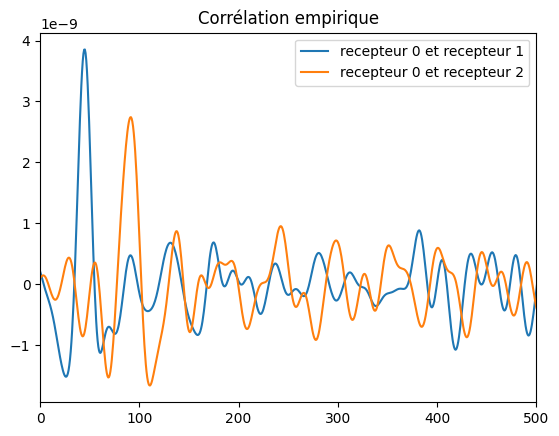

In [ ]:
l = -1
plt.plot(tau[:l],C_emp_1[:l], label = "recepteur 0 et recepteur 1")
plt.plot(tau_2[:l],C_emp_2[:l], label = "recepteur 0 et recepteur 2")
plt.xlim(0, 500)
plt.title("Corrélation empirique")
plt.legend()

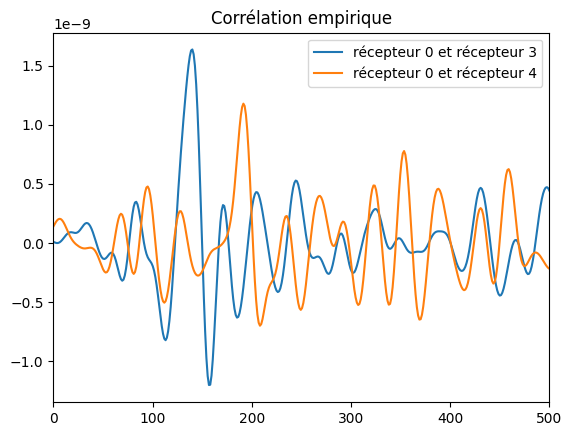

In [ ]:
plt.plot(tau_3[:l],C_emp_3[:l], label = "récepteur 0 et récepteur 3")
plt.plot(tau_4[:l],C_emp_4[:l], label = "récepteur 0 et récepteur 4")
plt.xlim(0, 500)
plt.title("Corrélation empirique")
plt.legend()

One can check that the correlation peak is invariant to space shift.

0
1
2
0
1
2


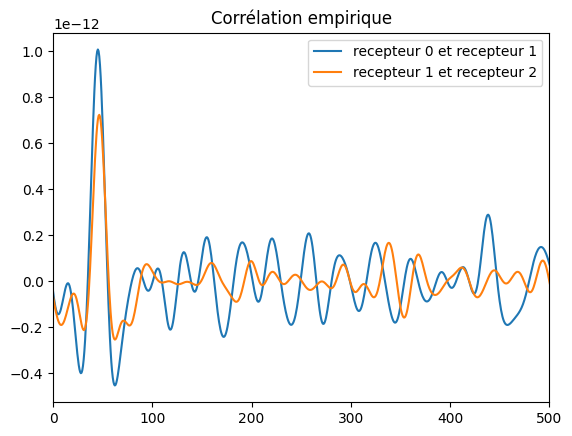

In [ ]:
# receivers = generate_receivers(1)
# C_emp_1,tau = C_empirical(5000,receivers[0], receivers[1], sources)
# C_emp_2,tau_2 = C_empirical(5000,receivers[1], receivers[2], sources)
l = -1
tau = np.concatenate((np.flip(-tau),tau))
tau_2 = np.concatenate((np.flip(-tau_2),tau_2))

plt.plot(tau[:l],C_emp_1[:l], label = "recepteur 0 et recepteur 1")

plt.plot(tau_2[:l],C_emp_2[:l], label = "recepteur 1 et recepteur 2")

plt.xlim(0, 500)
plt.title("Corrélation empirique")
plt.legend()

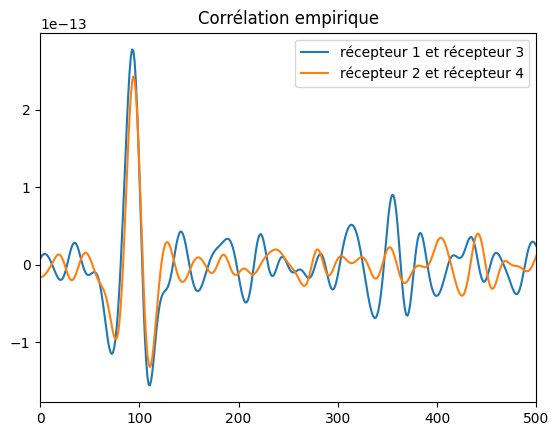

In [ ]:
# C_emp_3,tau_3 = C_empirical(9000,receivers[1], receivers[3], sources)
# C_emp_4,tau_4= C_empirical(9000,receivers[2], receivers[4], sources)
# tau_3 = np.concatenate((np.flip(-tau_3),tau_3))
#tau_4 = np.concatenate((np.flip(-tau_4),tau_4))

plt.plot(tau_3[:l],C_emp_3[:l], label = "récepteur 1 et récepteur 3")

plt.plot(tau_4[:l],C_emp_4[:l], label = "récepteur 2 et récepteur 4")

plt.xlim(0, 500)
plt.title("Corrélation empirique")
plt.legend()

---

### Situation 2

In [30]:
receivers = generate_receivers(2)
C_emp_1,tau = C_empirical(5000,receivers[0], receivers[1], sources)
tau = np.concatenate((np.flip(-tau),tau))

C_emp_2,tau2 = C_empirical(5000,receivers[0], receivers[2], sources)
tau2 = np.concatenate((np.flip(-tau2),tau2))

C_emp_3,tau3 = C_empirical(9000,receivers[0], receivers[3], sources)
tau3 = np.concatenate((np.flip(-tau3),tau3))

C_emp_4,tau4 = C_empirical(9000,receivers[0], receivers[4], sources)
tau4 = np.concatenate((np.flip(-tau4),tau4))

0
1
2
0


KeyboardInterrupt: 

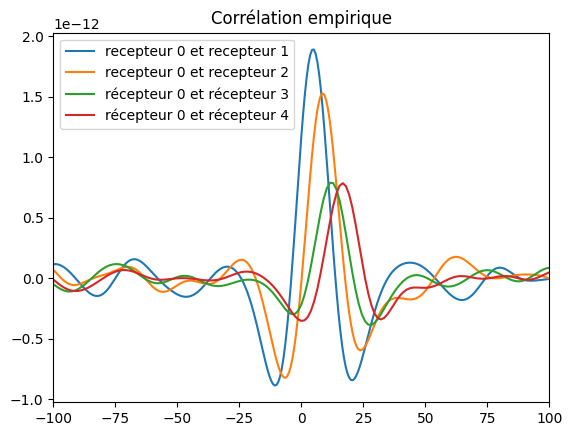

In [ ]:
l = -1

plt.plot(tau[:l],C_emp_1[:l], label = "recepteur 0 et recepteur 1")

plt.plot(tau2[:l],C_emp_2[:l], label = "recepteur 0 et recepteur 2")

plt.plot(tau3[:l],C_emp_3[:l], label = "récepteur 0 et récepteur 3")

plt.plot(tau4[:l],C_emp_4[:l], label = "récepteur 0 et récepteur 4")
plt.xlim(-100,100)

plt.title("Corrélation empirique")
plt.legend()

---

### Situation 3

In [46]:
receivers = generate_receivers(3)
# C_emp_1,tau1 = C_empirical(50000,receivers[0], receivers[1], sources, N=50, M = 100000)
# tau1 = np.concatenate((np.flip(-tau1),tau1))

# C_emp_2,tau2 = C_empirical(5000,receivers[0], receivers[2], sources,N=100)
# tau2 = np.concatenate((np.flip(-tau2),tau2))

# C_emp_3,tau3 = C_empirical(9000,receivers[0], receivers[3], sources,N=100)
# tau3 = np.concatenate((np.flip(-tau3),tau3))

C_emp_4,tau4 = C_empirical(1000000,receivers[0], receivers[4], sources, N=50, M = 1000000)
tau4 = np.concatenate((np.flip(-tau4),tau4))

0
1
2


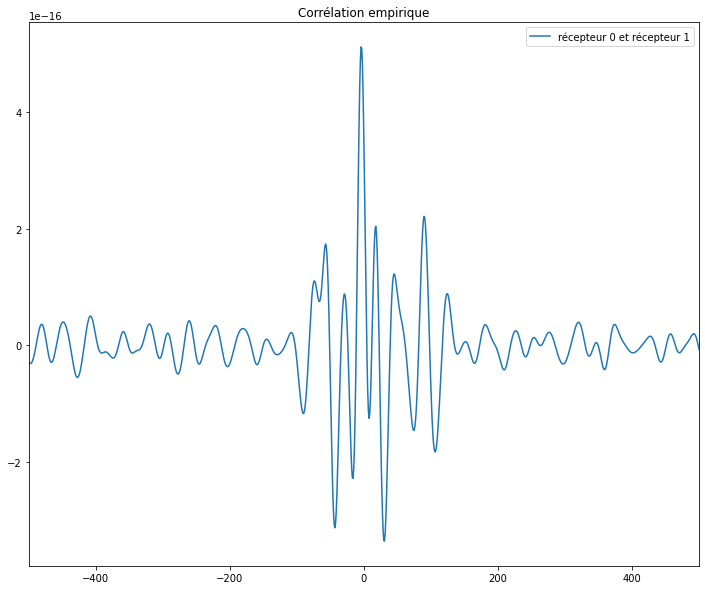

In [47]:
l = -1
plt.figure(figsize=(12,10))

#plt.plot(tau1[:l],C_emp_1[:l], label = "recepteur 0 et recepteur 1")

# plt.plot(tau2[:l],C_emp_2[:l], label = "recepteur 0 et recepteur 2")

# plt.plot(tau3[:l],C_emp_3[:l], label = "récepteur 0 et récepteur 3")

plt.plot(tau4[:l],C_emp_4[:l], label = "récepteur 0 et récepteur 1")
plt.xlim(-500,500)

plt.title("Corrélation empirique")
plt.legend()

---

### Question 3

An interesting and relevant question concerns the stability of the statistical properties of $C_{T,N}$. Indeed, the time of integration is an important parameter as the number of sources of noise is important. However, one should keep in mind that if we increase T, the scale of discretization $M$ should also be increased, because the peak of the correlation happen in a very narrow window, and so if the step of time $T/M$ is too important, one might decrease its intensity, or even worst miss it.

The time of integration should be carefully chosen according to the number of sources of noise considered. The more source of noise, the larger the time of integration. An important subtle in the subject is that it suggests to make first $T$ tend toward $+\infty$ (leading to $C_N$) and only after $N$ (defining $C^{1}$). The opposite would be of course unfortunate, because the signal could not be retrieved, because increasing indefinetely $N$ would kill first the signal, letting no chance to recover it afterward by letting $T$ goes to $+\infty$.

To be more specific, if $N$ is too important and $T$ not enough, the signal will be drown in the noise, and it might, without any further signal processing, be very hard to recover it. The most practical case is without a doubt to ensure that $T$ is large enough so that the noise becomes less important that the signal. Indeed, as the noise is supposed to disappear when we take the expectation, one would hope the same happen when we take $T$ large enough by an hypothesis of ergodicity. However, the Central Limit theorem could hint us it might converges with a speed of $\sqrt{T}$. In a similar way, the more distant the receivers for correlation considered are, the larger $T$ must be. I fixed the number of sources to $1000$, because above, it would become too complicated to find the right $T$ (with $M$ following it) to see the correlations appear.

Situation 3 seems to be the less favorable one for infering any correlation between receivers. It is rather easy to fathom because the receiver are not exposed similarly to the sources of noise. It is thus expected not to have a correlation as a Dirac like in situation 2 and 3 where the receivers were just getting the signal delayed with respect to each other. Therefore, the correlation will turn out to be mode diffuse in the signal and will appear as a wavepacket.

This question will be discussed more in details during the oral session.

### Evaluation of $C^{(1)}$

One defines :
$$
C^{(1)}(\tau, \mathbf{x}_1, \mathbf{x}_2) = \frac{1}{2\pi}\int_{\mathbb{R}}d\omega \int_{\mathbb{R}^3}d\mathbf{y} K(\mathbf{y}) \bar{\hat{F}}(\omega)\hat{G}(\omega,\mathbf{x}_1,\mathbf{y})\bar{\hat{G}}(\omega,\mathbf{x}_2,\mathbf{y})e^{i\omega \tau}
$$

A first option to compute this integral would be to use a Monte Carlo method, i.e interpret the integral over $\mathbf{y}$ as an expectation of the random variable $Y \in \mathbb{R}^3$ with density $K$. This is exactly what was done for computing $C_N$ in previous question, so one would expect from LLN that
$$
C_N \underset{N ⟶ \infty}{⟶} C^{(1)}
$$
An old school technique would be to use quadrature. This is relevant because we are not in very high dimension. For dimensions higher than $3$, it would becomes computationally too expensive.

Let's recall that one has $K(\mathbf{y}) = \displaystyle\prod\limits_{i = 1}^3 \frac{1}{\sqrt{2\pi}\sigma_i}\exp{-\frac{(\mathbf{y}_i - \mu_i)^2}{2\sigma_i^2}}$, but the integrand itself is not separable in $y$.

For now, let's start from the $1D$ case.
The principle of a quadrature is to approximate an integral over a finite interval I by a sum of well-chosen nodes $x_i$ and weights $w_i$ i.e :
$$
\int_{I}w(x)f(x) dx = \sum_{i = 1}^{n}w_if(x_i)
$$
On the right-hand side, $w_i$ is not the evaluation of $w$ at $x_i$, but simply the weight related to the node $x_i$.
One says the quadrature is of order p if it is exact for all polynomials of order $p$ or less. The number of nodes is related to the order we wish to have. A general result states that with $n$ nodes, the order is $2n - 1$ for well-chosen quadrature. More specifically, in our case, the function $w : x \mapsto w(x)$ is called the weight function.

$K$ will plays this role for what comes next, the main difference being that the integral we are concerned about sums over $\mathbb{R}^3$.
We will see later it is easy to generalize to the $\mathbb{R}^d$ case from the usual $1D$ setup. So for now, we will say the weight function is simply $x \mapsto e^{-x^2}$.

In general, Gauss quadratures are built from a sequence of orthogonal polynomials $(P_i)_{i\in \mathbb{N}}$. They are orthogonal for the scalar product defined as  $\langle f,g \rangle_w = \int_{I}f(x)g(x)w(x)dx$ so the elements of the sequence verify $\langle P_n,P_m \rangle_w = 0$ for $m \neq n$.

For a gaussian weights, the polynomials of the quadrature are known as Hermite Polynomials. The Hermite polynomial of degree $n$ is defined as :
$$
H_n(x) = (-1)^ne^{\frac{x^2}{2}} \frac{\text{d}^n}{\text{d}x^n}e^{-\frac{x^2}{2}}
$$

Without giving much details, since this is out of the scope of the project, the $n$ nodes are defined as the $n$ zeros of the polynomial $H_n$, while the weights are solution of a certain linear system to ensure the quadrature is of order $2n - 1$.

The corresponding weights and nodes were found thanks to the book of Abramowitz and Stegun, Handbook of Mathematical Functions, which is a reference in the domain of numerical analysis. I will use the quadrature with $n = 20$.

In [44]:
x = np.array([0.2453407083009, 0.7374737285454, 0.7374737285454, 1.23407, 2.25497, 2.78880, 3.34785, 3.94476, 4.94476, 5.38748])
x = np.concatenate((x,-1*x))
w = np.array([0.462243, 0.286675, 0.109017, 0.0248105, 0.00324177, 2.28338e-4, 7.80225e-6, 1.08606e-7, 4.39934e-10, 2.22939e-13])
w = np.concatenate((w,w))

n = 20 #Number of points of the troncature

mu = np.array([0.0, -200.0, 0.0])
sigma = np.array([100.0, 50.0, 100.0])

x_1 = x*np.sqrt(2)*sigma[0] + mu[0]#nodes along 1st dimension
x_2 = x*np.sqrt(2)*sigma[1] + mu[1]#nodes along 2nd dimension
x_3 = x*np.sqrt(2)*sigma[2] + mu[2]#nodes along 3rd dimension

w_1 = w*np.sqrt(2)*sigma[0] #weights along 1st dimension
w_2 = w*np.sqrt(2)*sigma[1] #weights along 2nd dimension
w_3 = w*np.sqrt(2)*sigma[2] #weights along 3rd dimension

Two last subtleties need to be precised. Firstly, one wish to perform the quadrature over $\mathbb{R}^3$. Secondly, our weight function is a gaussian but non-centered and with a certain scale factor $\sigma$. Indeed, $K$ is the product of gaussians of the form : $x \mapsto e^{-\frac{(x-\mu)^2}{2\sigma^2}}$, and it has to be taken into account for weights and nodes. If we note $\tilde{H}_n$ the Hermite polynomial of degree $n$ associated to the weight function $x \mapsto e^{-\frac{x^2}{2\sigma^2}}$, one can show one have the following relation between $H_n$ and $\tilde{H}_n$ : $H_n(x) = (2\sigma^2)^{n/2}\tilde{H}_n(\sqrt{2\sigma^2}x)$. One then immediately sees that zeros of $H_n$ are zeros of $\tilde{H}_n$ up to a factor : $\sqrt{2\sigma^2}$ i.e $\tilde{x}_i = \sqrt{2\sigma^2}x_i$. To take into account $\mu$, one just need to translate the zeros by the same quantity.

Concerning the weights, it can be shown by a change of variable that one just needs to scale up the weights by a factor $\sqrt{2\sigma^2}$ i.e $\tilde{w}_i = \sqrt{2\sigma^2}w_i$.

To adapt the 1D quadrature to a 3D quadrature is pretty natural with Fubini's theorem .
Suppose one knows:
$$
f(\tau,\mathbf{x_1},\mathbf{x}_2,\mathbf{y}) = \frac{1}{2\pi}
\int_{\mathbb{R}} d\omega \bar{\hat{F}}(\omega)\hat{G}(\omega,\mathbf{x}_1,\mathbf{y})\bar{\hat{G}}(\omega,\mathbf{x}_2,\mathbf{y})e^{i\omega \tau}
$$
and that we now want to compute $\displaystyle\prod\limits_{i = 1}^3\displaystyle\int_{\mathbb{R}^3}f(\tau,\mathbf{x}_1,\mathbf{x}_2,\mathbf{y}) \frac{1}{\sqrt{2\pi}\sigma_i}\exp{-\frac{(\mathbf{y}_i - \mu_i)^2}{2\sigma_i^2}}d\mathbf{y}$. Using $1D$ quadrature for each $\mathbf{y}_i$, one can hope to have a good approximation with the sum :
$$
\displaystyle\prod_{l = 1}^3 \frac{1}{\sqrt{2\pi}\sigma_l} \sum_{i,j,k = 1}^{n}w_iw_jw_kf(\tau,\mathbf{x}_1,\mathbf{x}_2,\mathbf{y}_{i,j,k})
$$
where $\mathbf{y}_{i,j,k} = [y_i,y_j,y_k]$ is the cartesian product of the different nodes along each dimension. One needs to realise at this point that we have to compute the cartesian product between $3$ sets of $20$ elements each, so it amounts to $20^3$ products. Therefore, it makes as much ifft to compute, one for each $\mathbf{y}_{i,j,k}$.

In [45]:
cst = 1/(np.sqrt(2*np.pi)*sigma[0])*1/(np.sqrt(2*np.pi)*sigma[1])*1/(np.sqrt(2*np.pi)*sigma[2])

def f_eval(x1,x2,y,M = 10000, T = 250):
  """
  Compute the evaluation of f (see above)
  Args :
    T : Length of the signal in s
    M = Number of points considered for the Inverse Fourier Transform
    x1 : Position of the first receiver
    x2 : Position of the second receiver
  """
  Fe = M/T #Sampling frequency
  Omega = np.linspace(0,(M - 1)*Fe/M,M)*np.pi*2 #range of frequencies
  G1 = Green_function(Omega,x1,y)
  G2 = Green_function(Omega,x2,y)
  F = cor_spec(Omega)
  liste_f = np.conjugate(F)*np.conjugate(G2)*G1
  list2_f = np.conjugate(F)*np.conjugate(G1)*G2
  list_t = np.fft.ifft(liste_f).real
  list2_t = np.flip(np.fft.ifft(list2_f).real)
  return np.concatenate((list2_t,list_t))

---

### Situation 1

In [46]:
receivers = generate_receivers(1)
integral_1 = 0
for i in range(n):
  for j in range(n):
    for k in range(n):
      integral_1 += w_1[i]*w_2[j]*w_3[k]*f_eval(receivers[0], receivers[1], np.array([x_1[i], x_2[j], x_3[k]]))
integral_1 *= cst

integral_2 = 0
for i in range(n):
  for j in range(n):
    for k in range(n):
      integral_2 += w_1[i]*w_2[j]*w_3[k]*f_eval(receivers[0], receivers[2], np.array([x_1[i], x_2[j], x_3[k]]))
integral_2 *= cst

integral_3 = 0
for i in range(n):
  for j in range(n):
    for k in range(n):
      integral_3 += w_1[i]*w_2[j]*w_3[k]*f_eval(receivers[0], receivers[3], np.array([x_1[i], x_2[j], x_3[k]]))
integral_3 *= cst

integral_4 = 0
for i in range(n):
  for j in range(n):
    for k in range(n):
      integral_4 += w_1[i]*w_2[j]*w_3[k]*f_eval(receivers[0], receivers[4], np.array([x_1[i], x_2[j], x_3[k]]))
integral_4 *= cst

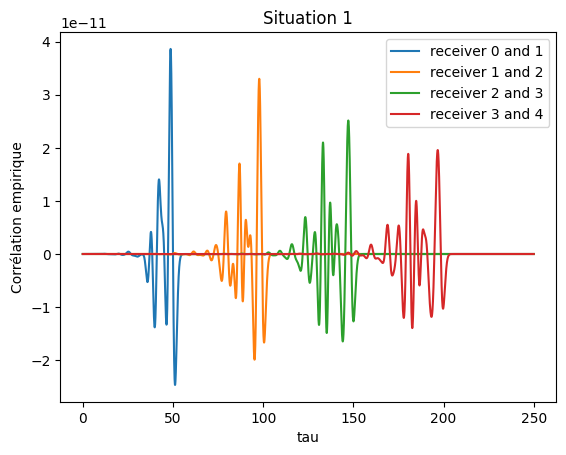

In [48]:
l = 10000
h = 20000
M = 10000
T = 250

tau1 = np.linspace(0,(M - 1)*T/M,M)
tau = np.concatenate((np.flip(-tau1),tau1))
plt.plot(tau[l:l + h], integral_1[l:l + h], label = 'receiver 0 and 1')

plt.plot(tau[l:l + h], integral_2[l:l + h], label = 'receiver 1 and 2')

plt.plot(tau[l:l + h], integral_3[l:l + h], label = 'receiver 0 and 3')

plt.plot(tau[l:l + h], integral_4[l:l + h], label = 'receiver 0 and 4')

plt.xlabel('tau')
plt.ylabel('Corrélation empirique')
plt.title('Situation 1')
plt.legend()

---

### Situation 2

In [ ]:
receivers = generate_receivers(2)
integral_1 = 0
for i in range(n):
  for j in range(n):
    for k in range(n):
      integral_1 += w_1[i]*w_2[j]*w_3[k]*f_eval(receivers[0], receivers[1], np.array([x_1[i], x_2[j], x_3[k]]))
integral_1 *= cst

integral_2 = 0
for i in range(n):
  for j in range(n):
    for k in range(n):
      integral_2 += w_1[i]*w_2[j]*w_3[k]*f_eval(receivers[0], receivers[2], np.array([x_1[i], x_2[j], x_3[k]]))
integral_2 *= cst

integral_3 = 0
for i in range(n):
  for j in range(n):
    for k in range(n):
      integral_3 += w_1[i]*w_2[j]*w_3[k]*f_eval(receivers[0], receivers[3], np.array([x_1[i], x_2[j], x_3[k]]))
integral_3 *= cst

integral_4 = 0
for i in range(n):
  for j in range(n):
    for k in range(n):
      integral_4 += w_1[i]*w_2[j]*w_3[k]*f_eval(receivers[0], receivers[4], np.array([x_1[i], x_2[j], x_3[k]]))
integral_4 *= cst

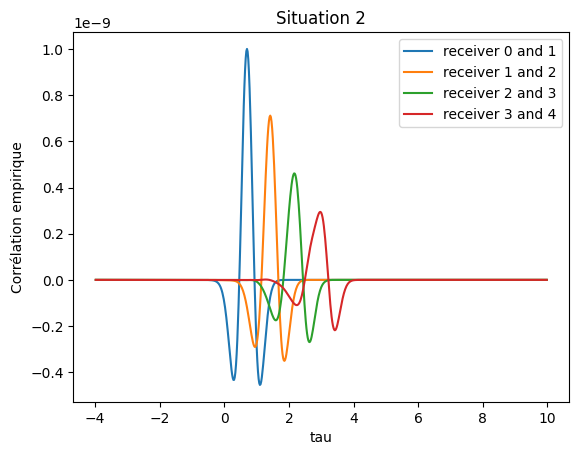

In [ ]:
l = 10000
h = 500
M = 10000
T = 200

tau1 = np.linspace(0,(M - 1)*T/M,M)
tau = np.concatenate((np.flip(-tau1),tau1))
plt.plot(tau[l - 200:l + h], integral_1[l - 200:l + h], label = 'receiver 0 and 1')

plt.plot(tau[l - 200:l + h], integral_2[l - 200:l + h], label = 'receiver 1 and 2')

plt.plot(tau[l - 200:l + h], integral_3[l - 200:l + h], label = 'receiver 0 and 3')

plt.plot(tau[l - 200:l + h], integral_4[l - 200:l + h], label = 'receiver 0 and 4')

plt.xlabel('tau')
plt.ylabel('Corrélation empirique')
plt.title('Situation 2')
plt.legend()

---

### Situation 3

In [ ]:
receivers = generate_receivers(3)
integral_1 = 0
for i in range(n):
  for j in range(n):
    for k in range(n):
      integral_1 += w_1[i]*w_2[j]*w_3[k]*f_eval(receivers[0], receivers[1], np.array([x_1[i], x_2[j], x_3[k]]))
integral_1 *= cst

integral_2 = 0
for i in range(n):
  for j in range(n):
    for k in range(n):
      integral_2 += w_1[i]*w_2[j]*w_3[k]*f_eval(receivers[0], receivers[2], np.array([x_1[i], x_2[j], x_3[k]]))
integral_2 *= cst

integral_3 = 0
for i in range(n):
  for j in range(n):
    for k in range(n):
      integral_3 += w_1[i]*w_2[j]*w_3[k]*f_eval(receivers[0], receivers[3], np.array([x_1[i], x_2[j], x_3[k]]))
integral_3 *= cst

integral_4 = 0
for i in range(n):
  for j in range(n):
    for k in range(n):
      integral_4 += w_1[i]*w_2[j]*w_3[k]*f_eval(receivers[0], receivers[4], np.array([x_1[i], x_2[j], x_3[k]]))
integral_4 *= cst

Text(0.5, 1.0, 'receiver 3 and 4')

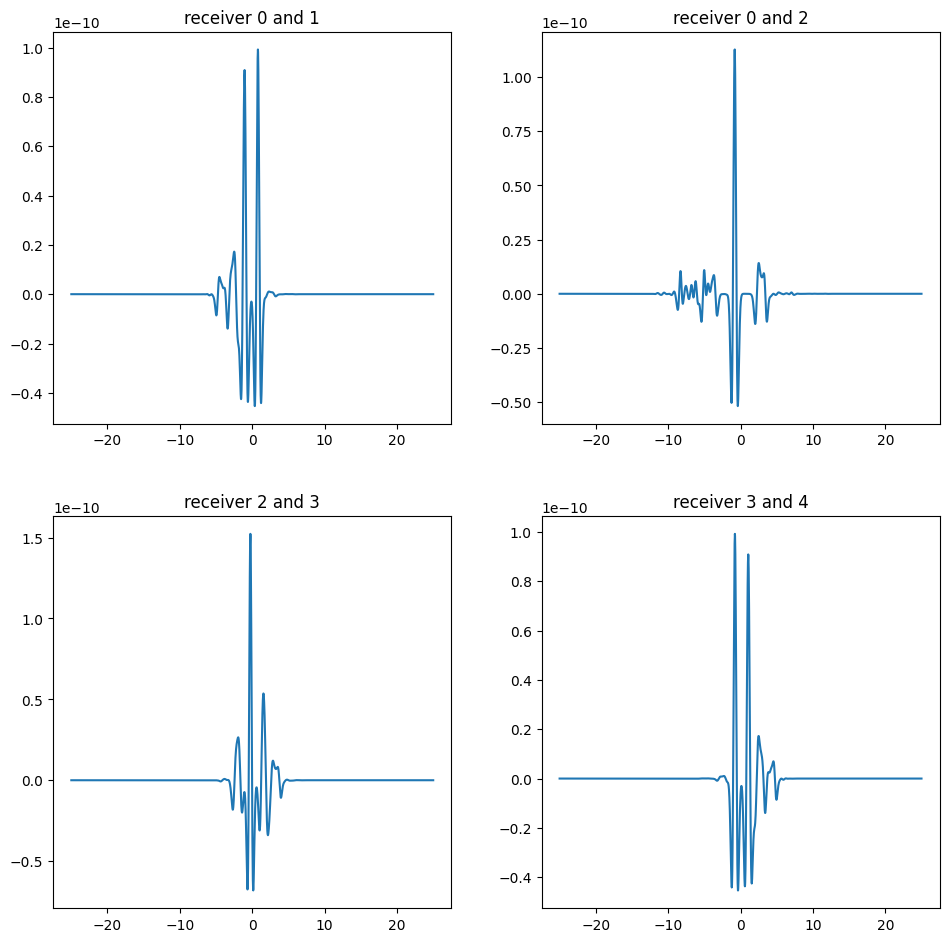

In [ ]:
fig, axs = plt.subplots(2,2)
fig.tight_layout()
fig.set_figheight(10)
fig.set_figwidth(10)

l = 10000
h = 1250
M = 10000
T = 200
tau1 = np.linspace(0,(M - 1)*T/M,M)
tau = np.concatenate((np.flip(-tau1),tau1))
axs[0,0].plot(tau[l - h:l + h], integral_1[l - h:l + h])
axs[0,0].set_title('receiver 0 and 1')

axs[0,1].plot(tau[l - h:l + h], integral_2[l - h:l + h])
axs[0,1].set_title('receiver 0 and 2')

axs[1,0].plot(tau[l - h:l + h], integral_3[l - h:l + h])
axs[1,0].set_title('receiver 2 and 3')

axs[1,1].plot(tau[l - h:l + h], integral_4[l - h:l + h])
axs[1,1].set_title('receiver 3 and 4')


## Question 4

### For the two first situations

We notice in situation 1 and 2 that the value of $\tau$ corresponding to the peak of correlation between two receivers is proportional to the distance between the receivers.

To explain this, an approximation that we can make is to consider the source is unique and located at the center of the sources distribution $\mu$, which is aligned with the receivers in the two first configurations, i.e $K(\mathbf{y})=\delta(\mathbf{y}-\mu)$

In this case, as all points only differ by their coordinates along the $y$ axis, we have $ \forall j, |\mathbf{x}_j - \mathbf{\mu}| = \langle e_y, \mathbf{x}_j - \mathbf{\mu} \rangle $, with $e_y = (0, 1, 0)^T$ and thus,

$$\overline{\hat{G}(\omega, \mathbf{x}_i, \mathbf{\mu})}\hat{G}(\omega, \mathbf{\mu}, \mathbf{x}_j)
=\frac{1}{16 \pi^2 \langle e_y, \mathbf{x}_i - \mathbf{\mu} \rangle  \cdot \langle e_j, \mathbf{x}_j - \mathbf{\mu} \rangle}
\exp(i\frac{\omega}{c_0}\langle e_y, \mathbf{x}_j - \mathbf{x}_i  \rangle)
$$

$C^{(1)}$ then becomes:

$$
C^{(1)}(\tau, \mathbf{x}_i, \mathbf{x}_j) = \frac{1}{16 \pi^2 \langle e_y, \mathbf{x}_i - \mathbf{\mu} \rangle  \cdot \langle e_j, \mathbf{x}_j - \mathbf{\mu} \rangle}
\frac{1}{2\pi}\int_{\mathbb{R}}d\omega {\hat{F}}(\omega)\exp(i\frac{\omega}{c_0}\langle e_y, \mathbf{x}_j - \mathbf{x}_i  \rangle)e^{-i\omega \tau}\\
= \frac{1}{16 \pi^2 \langle e_y, \mathbf{x}_i - \mathbf{\mu} \rangle  \cdot \langle e_j, \mathbf{x}_j - \mathbf{\mu} \rangle} F(\tau - \frac{1}{c_0}\langle e_y, \mathbf{x}_j - \mathbf{x}_i  \rangle)
$$

This means that in this approximation, the limit when $T \rightarrow \infty$ of the expectancy of the empirical correlation is proportional to the autocovariance function of the noise, with a temporal shift corresponding to the distance between the receivers divided by $c_0$.

This corresponds to the linear relationship empirically observed in question 1.

Then, a method to find $c_0$ is observe the empirical covariance of the signals recorded by two receivers, and then to find $\hat\tau = \text{argmax}_\tau C_{T,N}(\tau, x_i, x_j)$, and to estimate $\displaystyle \hat c_0 = \frac{\langle e_y, \mathbf{x}_j - \mathbf{x}_i \rangle }{\hat\tau}$.

This is implemented in the cells below for the situation 1 and 2.

In [38]:
N=10**4
print()
receivers = generate_receivers(situation=1)
for j in range(1, 5):
    print("\nComputing situation 1 between receiver 0 and ", j)
    t_axis, C_N = C_N_closed_form(0, j, receivers, sources)
    ind = np.argmax(C_N)
    peak_time = t_axis[ind]
    print("Estimation of c_0:", np.linalg.norm(receivers[0] - receivers[j]) / peak_time)



Computing situation 1 between receiver 0 and  1


100%|██████████| 1000/1000 [00:00<00:00, 1576.03it/s]


Estimation of c_0: 1.029763130792998

Computing situation 1 between receiver 0 and  2


100%|██████████| 1000/1000 [00:00<00:00, 1493.96it/s]


Estimation of c_0: 1.0125569620253163

Computing situation 1 between receiver 0 and  3


100%|██████████| 1000/1000 [00:00<00:00, 1158.38it/s]


Estimation of c_0: 1.0083025210084036

Computing situation 1 between receiver 0 and  4


100%|██████████| 1000/1000 [00:00<00:00, 1333.02it/s]

Estimation of c_0: 1.006695192549711


In [39]:
N=10**4
print()
receivers = generate_receivers(situation=2)
for j in range(1, 5):
    print("\nComputing situation 2 between receiver 0 and ", j)
    t_axis, C_N = C_N_closed_form(0, j, receivers, sources)
    ind = np.argmax(C_N)
    peak_time = t_axis[ind]
    print("Estimation of c_0:", np.linalg.norm(receivers[0] - receivers[j]) / peak_time)



Computing situation 2 between receiver 0 and  1


100%|██████████| 1000/1000 [00:00<00:00, 1394.79it/s]


Estimation of c_0: 1.1493103448275945

Computing situation 2 between receiver 0 and  2


100%|██████████| 1000/1000 [00:00<00:00, 1592.65it/s]


Estimation of c_0: 1.117206703910615

Computing situation 2 between receiver 0 and  3


100%|██████████| 1000/1000 [00:00<00:00, 1358.06it/s]


Estimation of c_0: 1.0908000000000027

Computing situation 2 between receiver 0 and  4


100%|██████████| 1000/1000 [00:00<00:00, 1115.82it/s]

Estimation of c_0: 1.0665600000000002


We can see that this method provides estimates of $c_0$ that are more accurate as the distance between the receivers increases.

### In the third situation

In situation 3, the receivers are not aligned anymore with the center of the sources and the previous simplifications do not hold anymore.

As explained in the question 1, the support of $C_N(\tau, \mathbf{x}_i, \mathbf{x}_j)$ is the interval of values taken by the time shift $s(\mathbf{y}) = \frac{1}{c_0}(|\mathbf{y} - \mathbf{x}_2| - |\mathbf{x}_1 - \mathbf{y}|) = \frac{1}{c_0} d(\mathbf{y})$ when $\mathbf{y}$ takes values in the support of the distribution $K$.
Then, if we find the empirical support of $s(\mathbf{y})$, we can deduce $c_0$ if we know the support of $d(\mathbf{y})$.
Formally, $K$ has a infinite support, and so does the distribution of $d(\mathbf{y})$, however we are looking for an interval which concentrates a most of the mass of the image distribution of $d(\mathbf{y})$ when $\mathbf{y} \sim  K$. 
As this distribution does not have a close form solution, a way to find such a region numerically is to sample points and to compute quantiles at levels $\alpha$ and $1-\alpha$, respectively denoted $q_\alpha$ and $q_{1-\alpha}$.
Similarly, we can estimate the support of $C_N(\tau, \mathbf{x}_i, \mathbf{x}_j)$ by computing the empirical quantiles $\hat q_\alpha$ and $\hat q_{1-\alpha}$ of the distribution on $\tau$ defined by $\frac{C_N(\tau, \mathbf{x}_i, \mathbf{x}_j)^2}{\int_\mathbb{R}C_N(t, \mathbf{x}_i, \mathbf{x}_j)^2dt}$.

Finally, an estimator of $c_0$ is $\displaystyle\frac{q_{1-\alpha} -  q_\alpha}{\hat q_{1-\alpha} - \hat q_\alpha}$, which is implemented in the cells below to retreive $c_0=1$.



In [40]:
def get_quantiles(receiver_1, receiver_2, q1=0.05, q2=0.95, N=10000):
    sources = generate_sources(N)
    dist_to_1 = np.linalg.norm(receiver_1 - sources, axis=1)
    dist_to_2 = np.linalg.norm(receiver_2 - sources, axis=1)
    diff = dist_to_1 - dist_to_2
    
    return np.quantile(diff, q1), np.quantile(diff, q2)

In [41]:
def find_support(array, alpha):
    """
    Given an arrayrepresenting a distribution, 
    computes the valuesbetween 
    """
    cumsum = np.cumsum(array)
    mass = cumsum[-1]
    start = np.argmax(cumsum >= mass*alpha)
    end = np.argmax(cumsum >= mass*(1-alpha))
    return start, end

In [42]:
receivers = generate_receivers(3)
print()
for j in range(1, 5):

    print("\nComputing situation 3 between receiver 0 and ", j)
    t_axis, C_N = C_N_closed_form(0, j, receivers, sources)

    # Compute the quantiles of d(y)
    q_a, q_b = get_quantiles(receivers[0], receivers[j], q1=0.01, q2=0.99, N=1000)

    # Compute the empirical support of C_N   
    q_hat_a, q_hat_b  = [t_axis[t] for t in find_support(C_N**2, 0.01)]

    print("Estimation of c_0:", (q_b-q_a) / (q_hat_b-q_hat_a))




Computing situation 3 between receiver 0 and  1


100%|██████████| 1000/1000 [00:00<00:00, 1499.45it/s]


Estimation of c_0: 1.0653993622997981

Computing situation 3 between receiver 0 and  2


100%|██████████| 1000/1000 [00:00<00:00, 1508.88it/s]


Estimation of c_0: 1.0315980939310196

Computing situation 3 between receiver 0 and  3


100%|██████████| 1000/1000 [00:00<00:00, 1579.35it/s]


Estimation of c_0: 1.0725813557313575

Computing situation 3 between receiver 0 and  4


100%|██████████| 1000/1000 [00:01<00:00, 926.09it/s]

Estimation of c_0: 0.9599142032724424


We observe that this method gives estimations of $c_0$ with a correct order of magnitude but is not very precise, due to the notion of empirical supports which is not stable enough.

Due to the high noise level of the empirical covariances that we are able to compute in reasonable time, these illustrative experiments were made using $C_N$, even if the methods are meant to be applied to emprirical data.